In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

dataset = pd.read_table('fruit_data_with_colors.txt')
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
#creating dummies
fs=pd.get_dummies(dataset['fruit_subtype'])
fs.head()

,braeburn,cripps_pink,golden_delicious,granny_smith,mandarin,selected_seconds,spanish_belsan,spanish_jumbo,turkey_navel,unknown
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [3]:
df = dataset.drop(columns=['fruit_name','fruit_label', 'fruit_subtype'])
X = pd.concat([df,fs],axis=1)
Y = dataset['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=104, test_size=0.25)
X.head()

,mass,width,height,color_score,braeburn,cripps_pink,golden_delicious,granny_smith,mandarin,selected_seconds,spanish_belsan,spanish_jumbo,turkey_navel,unknown
0,192,8.4,7.3,0.55,0,0,0,1,0,0,0,0,0,0
1,180,8.0,6.8,0.59,0,0,0,1,0,0,0,0,0,0
2,176,7.4,7.2,0.60,0,0,0,1,0,0,0,0,0,0
3,86,6.2,4.7,0.80,0,0,0,0,1,0,0,0,0,0
4,84,6.0,4.6,0.79,0,0,0,0,1,0,0,0,0,0


In [4]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
p=clf.predict(X_test)

In [5]:
matrix = multilabel_confusion_matrix(y_test,p)
print('Confusion matrix before pruning : \n', matrix)


Confusion matrix before pruning : 
 [[[10  0]
  [ 0  5]]

 [[13  0]
  [ 0  2]]

 [[ 8  0]
  [ 0  7]]

 [[14  0]
  [ 0  1]]]


[Text(478.2857142857143, 605.7257142857143, 'X[13] <= 0.5\ngini = 0.704\nsamples = 44\nvalue = [14, 3, 12, 15]'),
 Text(382.62857142857143, 512.537142857143, 'X[10] <= 0.5\ngini = 0.676\nsamples = 34\nvalue = [14, 3, 12, 5]'),
 Text(286.9714285714286, 419.34857142857146, 'X[3] <= 0.71\ngini = 0.585\nsamples = 29\nvalue = [14, 3, 12, 0]'),
 Text(191.31428571428572, 326.16, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(382.62857142857143, 326.16, 'X[3] <= 0.825\ngini = 0.583\nsamples = 22\nvalue = [7, 3, 12, 0]'),
 Text(286.9714285714286, 232.9714285714286, 'X[8] <= 0.5\ngini = 0.398\nsamples = 16\nvalue = [1, 3, 12, 0]'),
 Text(191.31428571428572, 139.7828571428571, 'X[6] <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [1, 0, 12, 0]'),
 Text(95.65714285714286, 46.594285714285775, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0]'),
 Text(286.9714285714286, 46.594285714285775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(382.62857142857143, 139.7828571428571, 'gini = 0.0\

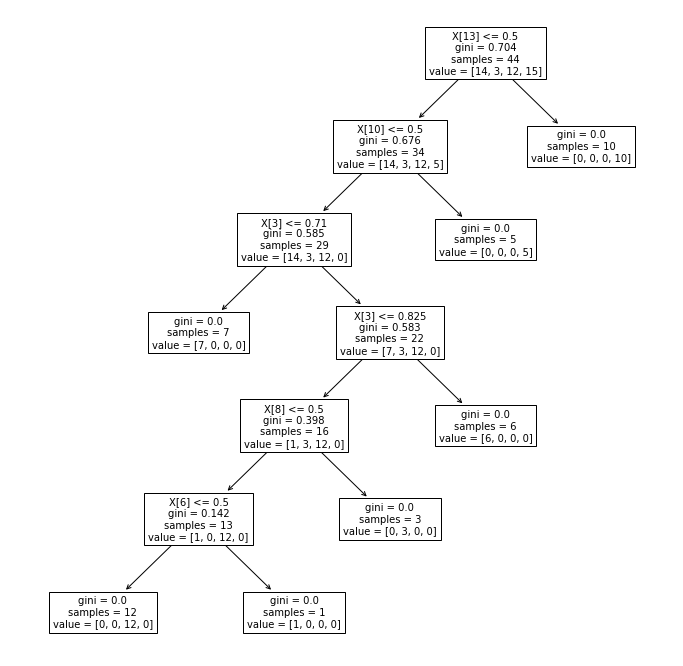

In [6]:
plt.figure(figsize=(12,12))
(tree.plot_tree(clf, fontsize=10))

In [7]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.04195804 0.10292832 0.12034679 0.13714734 0.18078512]


In [8]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

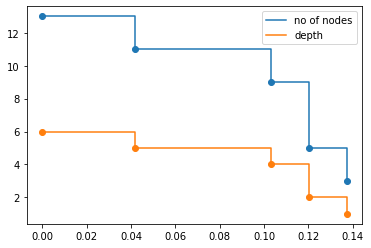

In [9]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

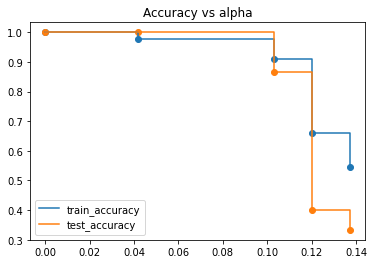

In [10]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [11]:
clf_ = DecisionTreeClassifier(random_state=0, ccp_alpha=0.10)
clf_.fit(X_train,y_train)
y_test_pred = clf_.predict(X_test)

In [12]:
matrix = multilabel_confusion_matrix(y_test,y_test_pred)
print('Confusion matrix After pruning : \n', matrix)

Confusion matrix After pruning : 
 [[[10  0]
  [ 0  5]]

 [[13  0]
  [ 0  2]]

 [[ 8  0]
  [ 0  7]]

 [[14  0]
  [ 0  1]]]


[Text(446.40000000000003, 597.96, 'X[13] <= 0.5\ngini = 0.704\nsamples = 44\nvalue = [14, 3, 12, 15]'),
 Text(334.8, 489.24, 'X[10] <= 0.5\ngini = 0.676\nsamples = 34\nvalue = [14, 3, 12, 5]'),
 Text(223.20000000000002, 380.52000000000004, 'X[3] <= 0.71\ngini = 0.585\nsamples = 29\nvalue = [14, 3, 12, 0]'),
 Text(111.60000000000001, 271.8, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 0.825\ngini = 0.583\nsamples = 22\nvalue = [7, 3, 12, 0]'),
 Text(223.20000000000002, 163.07999999999998, 'X[8] <= 0.5\ngini = 0.398\nsamples = 16\nvalue = [1, 3, 12, 0]'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.142\nsamples = 13\nvalue = [1, 0, 12, 0]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(446.40000000000003, 380.52000000000004, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]'),
 Text(558.0, 489.24, 'gini = 0.

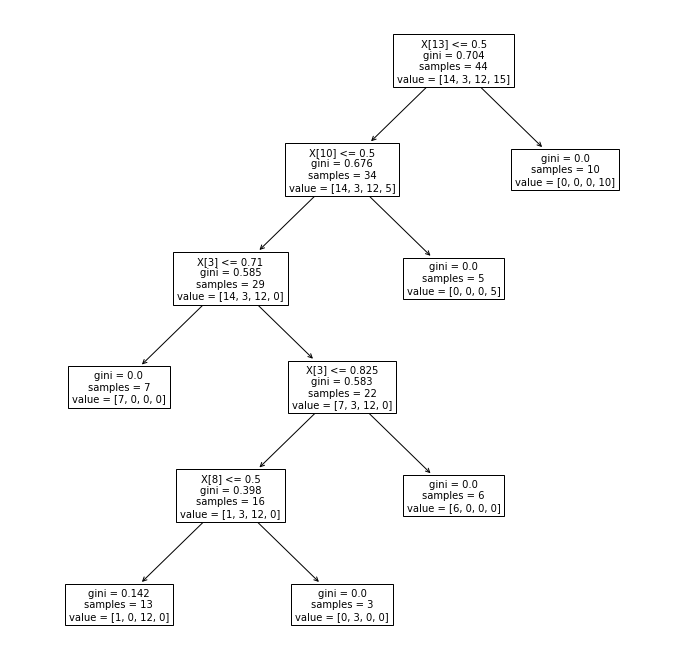

In [13]:
plt.figure(figsize=(12,12))
(tree.plot_tree(clf_, fontsize=10))

In [14]:
print("\t\t\tBefore Pruning")
print("--------------------------------------------------------------")
print('accuracy: ', accuracy_score(y_test,p))
print("--------------------------------------------------------------")
matrix = classification_report(y_test,p)
print('Classification report : \n',matrix)

			Before Pruning
--------------------------------------------------------------
accuracy:  1.0
--------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [15]:
print("\t\t\tAfter Pruning")
print("--------------------------------------------------------------")
print('accuracy: ', accuracy_score(y_test,y_test_pred))
print("--------------------------------------------------------------")
matrix = classification_report(y_test,y_test_pred)
print('Classification report : \n',matrix)

			After Pruning
--------------------------------------------------------------
accuracy:  1.0
--------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

